In [2]:
import geopandas as gpd
import pandas as pd
from pyproj import CRS
import matplotlib.pyplot as plt
import os
import numpy as np
import mapclassify
import contextily as ctx
#importing all important packages

roads_fp = "roads.shp"
metro_fp = "metro.shp"
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)
grid_fp = 'MetropAccess_YKR_grid_EurefFIN.shp'
grid = gpd.read_file(grid_fp)
grid = grid.to_crs(epsg=3857)
roads = roads.to_crs(crs=grid.crs)
metro = metro.to_crs(crs=grid.crs)
#setting al crs to 3857

fp = 'travel_times_to_ 5785640.txt'
data = pd.read_csv(fp, sep=';')
data.drop(data.columns.difference(['car_r_t', 'from_id', 'to_id']), 1, inplace=True)
#reading the data file and keep ony important column, 

data_geo = grid.merge(data, left_on='YKR_ID', right_on='from_id')
data_geo = data_geo.replace(-1, np.nan)
data_geo = data_geo.dropna()
#merging grid and data of travel time to the north of helsinki in rush hours by car, drop all missing value (-1)



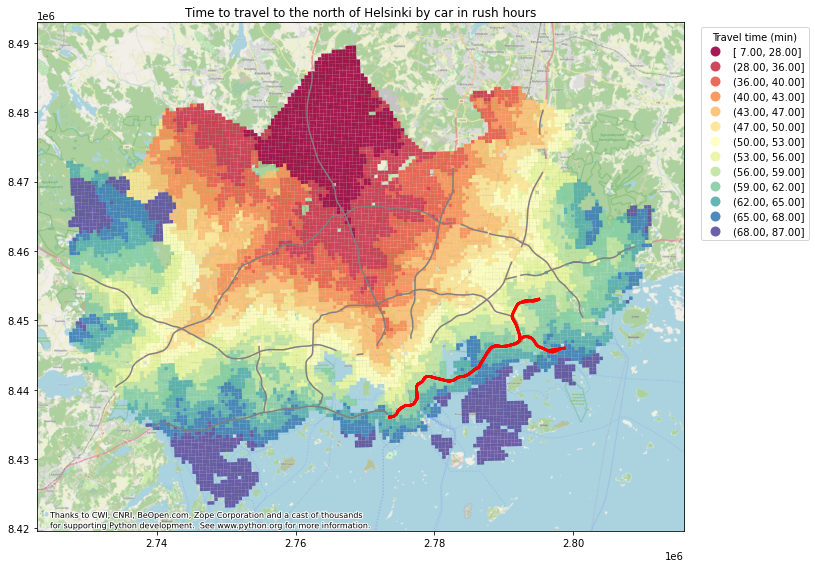

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
#create the subplot
data_geo.plot(ax=ax, column="car_r_t", linewidth=0.03, cmap="Spectral", scheme="quantiles", k=13, alpha=0.9, legend = True)
# plot the data of traveling time by car in rush hours, column = car_r_t

# Re-position the legend and set a title
ax.set_title('Time to travel to the north of Helsinki by car in rush hours')

ax.get_legend().set_bbox_to_anchor((1.2,1))
ax.get_legend().set_title("Travel time (min)")

# add road on top of previous map
roads.plot(ax=ax, color="grey", linewidth=1.5)
# Add metro on top of the previous map
metro.plot(ax=ax, color="red", linewidth=2.5)

# Remove the empty white-space around the axes
plt.tight_layout()

#add base map
ctx.add_basemap(ax, attribution=credits, source=ctx.providers.OpenStreetMap.Mapnik)



# saving image of the map to docs file with dpi = 200
myfp = r'docs/'
figname = "time_to_travel_to_the_north_of_Helsinki_by_car_in_rush_hour.png"
outfp = os.path.join(myfp, figname)
plt.savefig(outfp, dpi=200)